# Kelly Principle

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Consider a fair bet, quoted at 2 (50/50 chance). Let's first assume we know with certainty the winner. How much would
he bet? Probably all he had since you would win with certainty. In this case The capital would grow exponentially and after N bets he would have $2^N$ times the original bankroll.

This exponential growth of capital is not uncommon in economics. In fact, if the binary digits in the above channel were arriving at the rate of one per week, the sequence of bets would have the value of an investment paying 100% interest per week compounded weekly. We will make use of a quantity $G$ called the exponential rate of growth of the gambler’s capital, where

$$G = \lim_{N \to +\infty} \frac{1}{N} \log \frac{V_N}{V_0}$$

That means

$$V_0 = V_N e^{G N}$$

In the previous example, $G=1$. 

Consider the case now of a noisy binary channel, where each transmitted symbol has probability, $p$, of error and $q$ of correct transmission. Now the gambler could still bet his entire capital each time, and, in fact, this would maximize the expected value of his capital, which in this case would be given by

$$V_N  = (2q)^N V_0$$

(**this is true only if $p > 0.5$**)


This would be little comfort, however, since when N was large he would probably be broke and, in fact, would be broke with probability one if he continued indefinitely. Let us, instead, assume that he bets a fraction $l$ of his capital each time. Then

$$V_N = (1 + l)^W (1 − l)^L V_0$$

where $W$ and $L$ are the number of wins and losses in the $N$ bets. Then

$$\begin{align} G &= \lim_{N \to +\infty} (1 + l)^W (1 − l)^L V_0 \\
&= \lim_{N \to +\infty} \frac{1}{N} \log \frac{(1 + l)^W (1 − l)^L V_0}{V_0} \\
&= \lim_{N \to +\infty} \left[ \frac{W}{N} \log(1 + l) + \frac{L}{N} \log(1 - l) \right] \\
&= q \log(1 + l) + p \log(1 - l) \end{align}$$


In [82]:
bet_portions = np.arange(0.01, 1, 0.001) # waged fraction
correct_transmission_prob = np.arange(0.5, 1.05, 0.05) # chance of correct communication

In [102]:
q = 0.8
g_dict = {}
for q in correct_transmission_prob:
    q = round(q, 2)
    g_dict_by_prob = {}
    for l in bet_portions:
        g = q * np.log2(1 + l) + (1-q) * np.log2(1-l)
        g_dict_by_prob[l] = g
    
    g_dict[q] = g_dict_by_prob


(-1.5, 1.1)

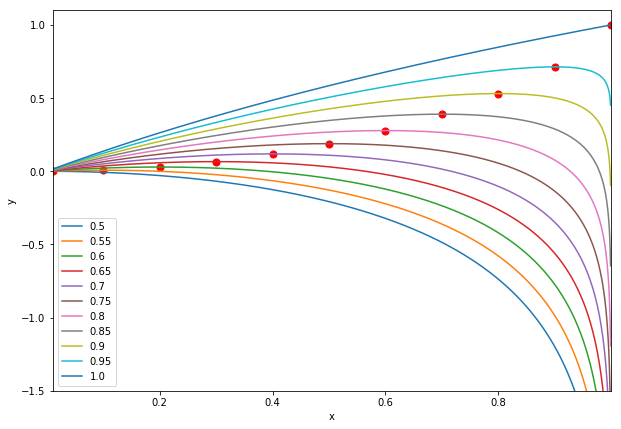

In [115]:
to_plot = pd.DataFrame(g_dict)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)

to_plot.plot(ax=ax)
max_g = to_plot.max(axis=0)
max_g.index =  to_plot.idxmax(axis=0, skipna=True).values
max_g = max_g.reset_index()

max_g.columns =['x', 'y']
max_g.plot(kind ='scatter', x='x', y='y', ax=ax, color = 'red', s=50)

ax.set_ylim(-1.5, 1.1)

In [113]:
to_plot.iloc[490: 505, :]

,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
0.500,-0.207519,-0.128271,-0.049022,0.030226,0.109474,0.188722,0.267970,0.347218,0.426466,0.505714,0.584963
0.501,-0.208482,-0.129042,-0.049601,0.029840,0.109280,0.188721,0.268162,0.347602,0.427043,0.506483,0.585924
0.502,-0.209449,-0.129815,-0.050182,0.029451,0.109085,0.188718,0.268351,0.347985,0.427618,0.507251,0.586885
0.503,-0.210419,-0.130592,-0.050766,0.029060,0.108887,0.188713,0.268540,0.348366,0.428192,0.508019,0.587845
0.504,-0.211392,-0.131372,-0.051352,0.028667,0.108687,0.188706,0.268726,0.348746,0.428765,0.508785,0.588805
0.505,-0.212368,-0.132155,-0.051942,0.028271,0.108485,0.188698,0.268911,0.349124,0.429337,0.509550,0.589763
0.506,-0.213348,-0.132941,-0.052534,0.027873,0.108280,0.188687,0.269094,0.349501,0.429908,0.510315,0.590722
0.507,-0.214331,-0.133730,-0.053129,0.027472,0.108073,0.188674,0.269275,0.349876,0.430477,0.511078,0.591679
0.508,-0.215317,-0.134521,-0.053726,0.027069,0.107865,0.188660,0.269455,0.350250,0.431046,0.511841,0.592636
0.509,-0.216306,-0.135316,-0.054326,0.026664,0.107653,0.188643,0.269633,0.350623,0.431613,0.512603,0.593593


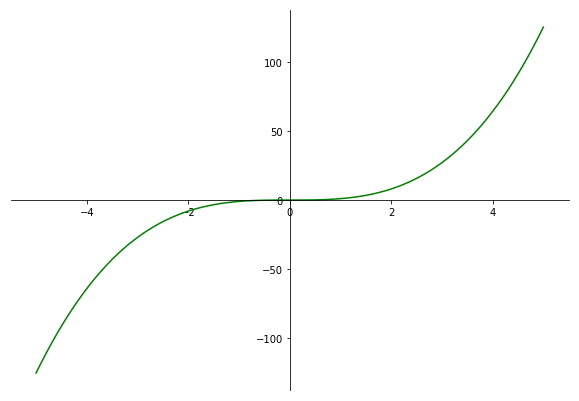

In [6]:

# 100 linearly spaced numbers
x = np.linspace(-1,1,100)

# the function, which is y = x^3 here
y = x**3

# setting the axes at the centre
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()